# House Prices in Tunisia 
I performed data cleaning in this jupyter notebook. I then used the clean data in app.py .

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer


In [470]:
df = pd.read_csv('results.csv')
df.head()

,title,price,location,area,num_rooms,num_bedrooms,num_baths,Type_de_bien,Surface_de_la_parcelle,Etat,Annees,Type_du_sol,Nombre_detages,features,latitude,longitude,url
0,Vente de maison à Riad El Andalous près d'Ariana,450 000 EUR,Cité Ennasr 1 à\n\t\t\t\t\t\t\tAriana Ville,250.0,8.0,5.0,NaN,Maison,650\n\t\t\t\t\t\t\t\tm²,Bon état,NaN,Marbre,NaN,Jardin;Terrasse;Garage;Chambre rangement;Meubl...,36.862500,10.195560,https://www.mubawab.tn/fr/a/8249413/vente-de-m...
1,À vendre – Villa S4 avec piscine à El Menzah 5,1 800 000 TND,Cité El Menzah,612.0,NaN,5.0,NaN,Maison,NaN,NaN,NaN,NaN,NaN,Jardin;Garage;Piscine,32.960600,10.527630,https://www.mubawab.tn/fr/a/8244867/%C3%A0-ven...
2,À vendre une maison sur 3 niveaux,480 000 TND,La Marsa à\n\t\t\t\t\t\t\tLa Marsa,225.0,2.0,2.0,NaN,Maison,NaN,Nouveau,NaN,NaN,NaN,Jardin;Terrasse,36.876389,10.325278,https://www.mubawab.tn/fr/a/8243998/%C3%A0-ven...
3,"À VENDRE, Maison neuve à Hammamet – Zone Théâtre",Prix à consulter,Hammamet à\n\t\t\t\t\t\t\tHammamet,360.0,5.0,4.0,NaN,Villa,603\n\t\t\t\t\t\t\t\tm²,Nouveau,NaN,NaN,NaN,Jardin;Terrasse;Piscine;Chauffage central;Cuis...,36.401080,10.614570,https://www.mubawab.tn/fr/a/8239441/%C3%A0-ven...
4,Villa S6 à vendre à La Cagna El Ouardia,Prix à consulter,Lakanya à\n\t\t\t\t\t\t\tEl Ouardia,317.0,7.0,6.0,NaN,Villa,NaN,À rénover,NaN,NaN,NaN,Terrasse;Garage;Entre-seul,36.835610,10.215870,https://www.mubawab.tn/fr/a/8246417/villa-s6-%...


In [471]:
to_remove=['num_baths','Annees','Nombre_detages']
df = df.drop(columns=to_remove)

def clean_text(text):
    if pd.isnull(text):
        return text
    # Remove \n, \t, and extra spaces
    return str(text).replace('\n', ' ').replace('\t', ' ').strip()
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].apply(clean_text)
df.head()

,title,price,location,area,num_rooms,num_bedrooms,Type_de_bien,Surface_de_la_parcelle,Etat,Type_du_sol,features,latitude,longitude,url
0,Vente de maison à Riad El Andalous près d'Ariana,450 000 EUR,Cité Ennasr 1 à Ariana Ville,250.0,8.0,5.0,Maison,650 m²,Bon état,Marbre,Jardin;Terrasse;Garage;Chambre rangement;Meubl...,36.862500,10.195560,https://www.mubawab.tn/fr/a/8249413/vente-de-m...
1,À vendre – Villa S4 avec piscine à El Menzah 5,1 800 000 TND,Cité El Menzah,612.0,NaN,5.0,Maison,NaN,NaN,NaN,Jardin;Garage;Piscine,32.960600,10.527630,https://www.mubawab.tn/fr/a/8244867/%C3%A0-ven...
2,À vendre une maison sur 3 niveaux,480 000 TND,La Marsa à La Marsa,225.0,2.0,2.0,Maison,NaN,Nouveau,NaN,Jardin;Terrasse,36.876389,10.325278,https://www.mubawab.tn/fr/a/8243998/%C3%A0-ven...
3,"À VENDRE, Maison neuve à Hammamet – Zone Théâtre",Prix à consulter,Hammamet à Hammamet,360.0,5.0,4.0,Villa,603 m²,Nouveau,NaN,Jardin;Terrasse;Piscine;Chauffage central;Cuis...,36.401080,10.614570,https://www.mubawab.tn/fr/a/8239441/%C3%A0-ven...
4,Villa S6 à vendre à La Cagna El Ouardia,Prix à consulter,Lakanya à El Ouardia,317.0,7.0,6.0,Villa,NaN,À rénover,NaN,Terrasse;Garage;Entre-seul,36.835610,10.215870,https://www.mubawab.tn/fr/a/8246417/villa-s6-%...


In [472]:
df= df[df['price'].str.contains('TND', na=False)].copy()
df['total_area']=df['area']
df.drop('area', axis=1, inplace=True)


# Remove 'TND' and all non-digit characters, return as integer
df['price'] = df['price'].str.replace('TND', '', regex=False)
df['price'] = df['price'].str.replace(r'[^\d]', '', regex=True)
df['price'] = df['price'].astype(int)



def split_location(location):
    if pd.isnull(location):
        return (np.nan, np.nan)
    # Split only by 'à'
    parts = [p.strip() for p in str(location).split('à')]
    parts = [p for p in parts if p]  # remove empty strings
    if len(parts) == 2:
        return parts[0], parts[1]
    elif len(parts) == 1:
        return parts[0], np.nan
    else:  # more than 2 parts, use first and last as city and region
        return parts[0], parts[-1]

df[['city', 'region']] = df['location'].apply(split_location).apply(pd.Series)

df = df.drop(columns=['location', 'Type_du_sol'])
df.rename(columns={'Type_de_bien': 'type_of_good'}, inplace=True)
df.rename(columns={'Surface_de_la_parcelle': 'total_land_area'}, inplace=True)
df.rename(columns={'Etat': 'condition'}, inplace=True)

df = df[['title', 'num_rooms', 'num_bedrooms','type_of_good','total_area', 'total_land_area', 'condition','latitude','longitude','city', 'region','features','url','price']]



In [473]:
df['total_land_area'] = df['total_land_area'].str.replace(' m²', '', regex=False)
df['total_land_area'] = pd.to_numeric(df['total_land_area'], errors='coerce')
df['type_of_good'] = df['type_of_good'].astype('string')
df['condition'] = df['condition'].astype('string')


df['title'] = df['title'].astype('string')
df['region'] = df['region'].astype('string')
df['city'] = df['city'].astype('string')
df['num_rooms'] = df['num_rooms'].astype('Int64')
df['total_area'] = df['total_area'].astype('Int64')
df['num_bedrooms'] = df['num_bedrooms'].astype('Int64')
df['features'] = df['features'].astype('string')
df['url'] = df['url'].astype('string')


In [474]:
feature_lists = df['features'].apply(lambda x: x.split(';') if pd.notnull(x) else [])
mlb = MultiLabelBinarizer()
df_features = pd.DataFrame(
    mlb.fit_transform(feature_lists),
    columns=mlb.classes_,
    index=df.index
).astype(bool)
df = pd.concat([df, df_features], axis=1)
df= df[
    (df['price'] < 3_000_000) &
    (df['total_area'] < 1_000)
]
df.to_csv('cleaned_data.csv', index=False)
df.dtypes.to_frame("dtype")


,dtype
title,string[python]
num_rooms,Int64
num_bedrooms,Int64
type_of_good,string[python]
total_area,Int64
total_land_area,float64
condition,string[python]
latitude,float64
longitude,float64
city,string[python]


PS: A certain feature having the value 'False' means that it's either absent or the property owner didn't add it to the features.

## Exploratory Analysis:

In [475]:
# Number of unique regions (governorates/cities)
num_regions = df['region'].nunique()
print("Number of different regions:", num_regions)

# Number of unique areas (neighborhoods/districts)
num_areas = df['city'].nunique()
print("Number of different areas:", num_areas)


Number of different regions: 67
Number of different areas: 338


In [476]:
print(df['region'].value_counts().head(10))


region
Hammamet        456
La Marsa        270
La Soukra       186
Ariana Ville    175
Djerba          115
El Menzah        98
Nabeul           75
Raoued           64
Sousse Ville     56
Carthage         50
Name: count, dtype: Int64


In [477]:
print(df['city'].value_counts().head(10))

city
Hammamet         214
Hammamet Sud     119
Kélibia          109
Djerba           108
La Soukra         99
Hammamet Nord     97
La Marsa          79
Gammarth          54
Bizerte           51
Nabeul            45
Name: count, dtype: Int64


Most home listings in the dataset are concentrated in Hammamet, La Marsa, La Soukra.

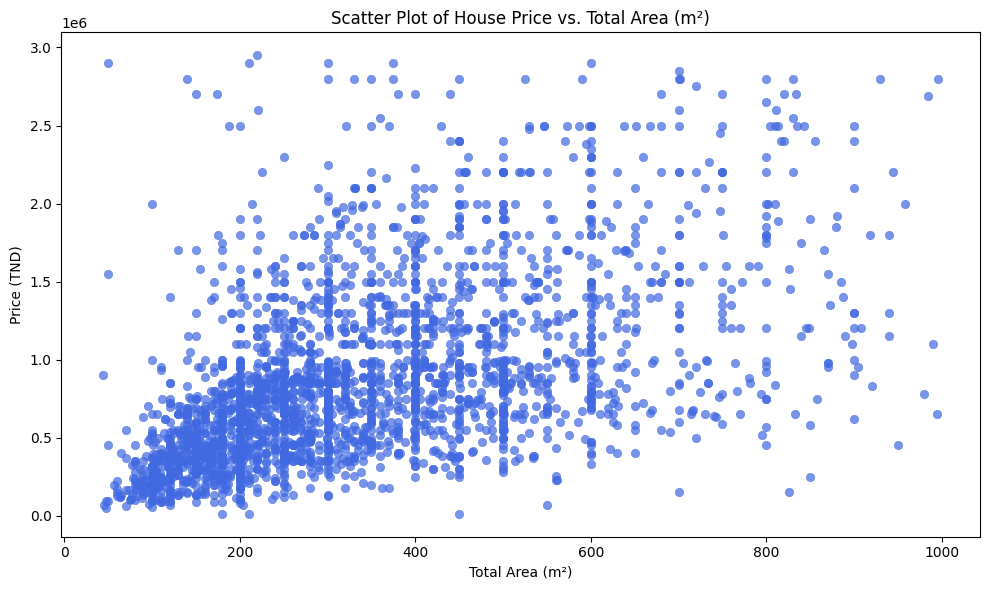

In [478]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='total_area',
    y='price',
    alpha=0.7,
    color='royalblue',
    edgecolor=None
)
plt.title("Scatter Plot of House Price vs. Total Area (m²)")
plt.xlabel("Total Area (m²)")
plt.ylabel("Price (TND)")
plt.tight_layout()
plt.show()

In [479]:
print(df['price'].describe())
print(df['total_area'].describe())

count    2.812000e+03
mean     8.920804e+05
std      5.656320e+05
min      1.234500e+04
25%      4.700000e+05
50%      7.700000e+05
75%      1.200000e+06
max      2.950000e+06
Name: price, dtype: float64
count        2812.0
mean       345.1234
std      184.496486
min            44.0
25%           200.0
50%           300.0
75%           450.0
max           996.0
Name: total_area, dtype: Float64


In [480]:
min_price = df['price'].min()
max_price = df['price'].max()
print(min_price,max_price)

12345 2950000
